## Titanic Project 
Problem Statement: The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [6]:
import pandas as pd
import numpy as np
#For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
# For Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score

In [7]:
df=pd.read_csv('titanic_train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

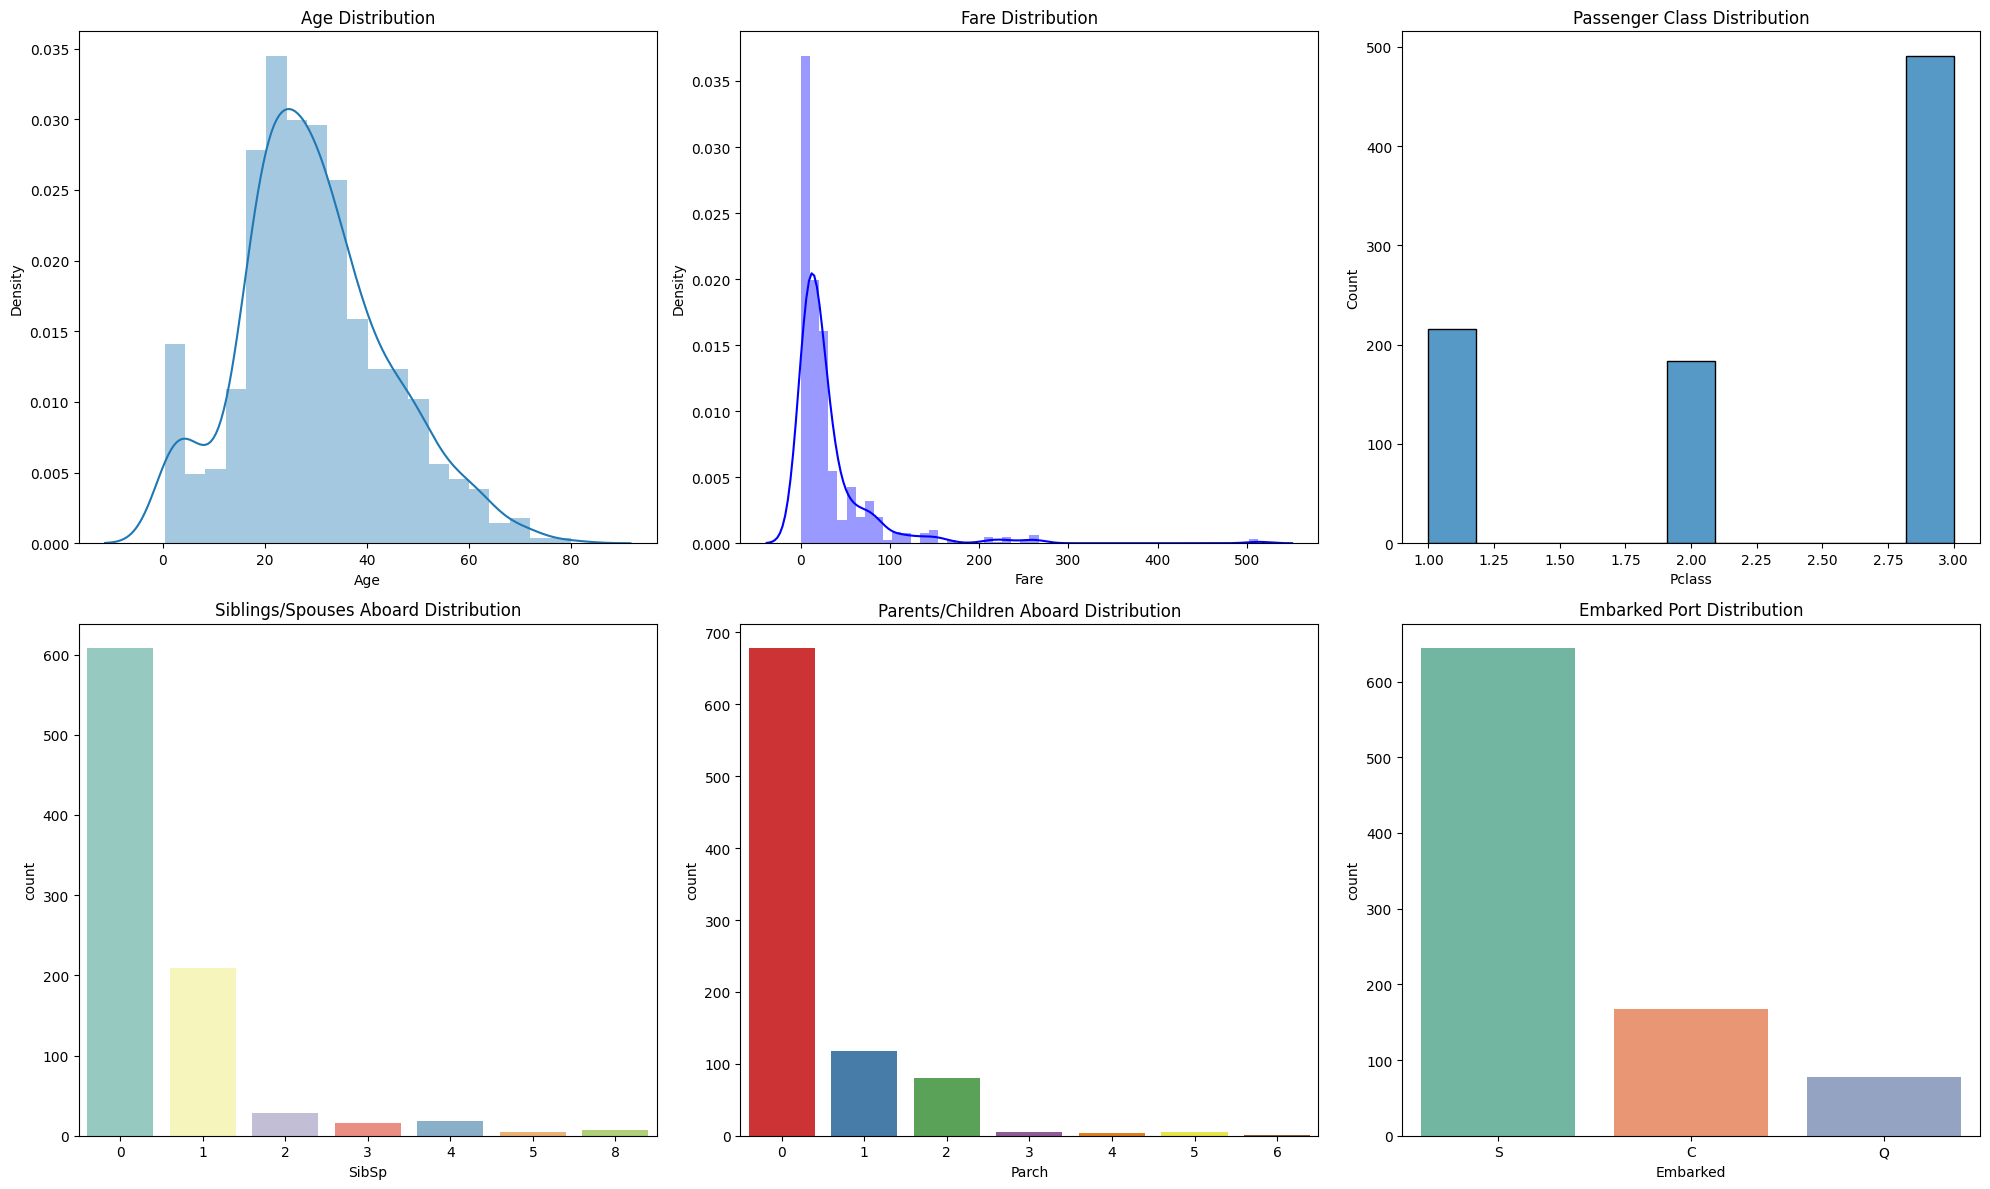

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

# Age distribution
sns.distplot(df['Age'].dropna(), kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

# Fare distribution
sns.distplot(df['Fare'], kde=True, ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Fare Distribution')

# Pclass distribution
sns.histplot(x='Pclass', data=df, ax=axs[0, 2], palette='Set2')
axs[0, 2].set_title('Passenger Class Distribution')

# SibSp distribution
sns.countplot(x='SibSp', data=df, ax=axs[1, 0], palette='Set3')
axs[1, 0].set_title('Siblings/Spouses Aboard Distribution')

# Parch distribution
sns.countplot(x='Parch', data=df, ax=axs[1, 1], palette='Set1')
axs[1, 1].set_title('Parents/Children Aboard Distribution')

# Embarked distribution
sns.countplot(x='Embarked', data=df, ax=axs[1, 2], palette='Set2')
axs[1, 2].set_title('Embarked Port Distribution')

plt.tight_layout()
plt.show()

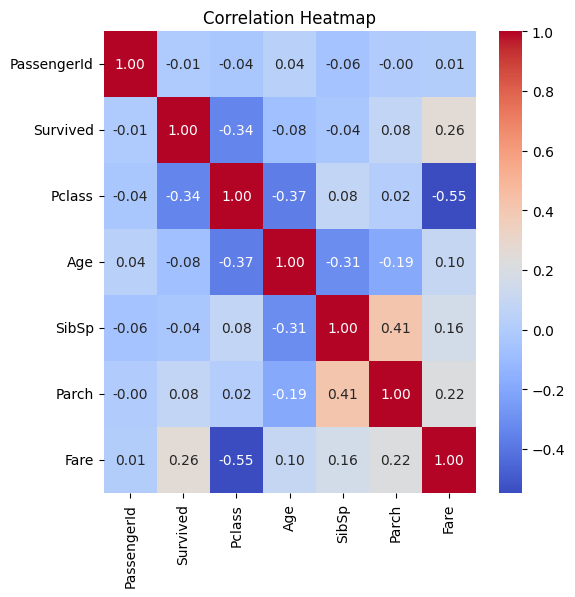

In [12]:
# Correlation heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Preprocessing

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
print("Missing values before imputation:")
print(df.isnull().sum())

age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

print("Data type of 'Embarked':", df['Embarked'].dtype)
print("Unique values in 'Embarked':", df['Embarked'].unique())

df['Embarked'].replace('', np.nan, inplace=True)
df['Embarked'].replace(' ', np.nan, inplace=True)

df['Embarked'] = df['Embarked'].astype(str)

most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

df.drop('Cabin', axis=1, inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())
     

Missing values before imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Data type of 'Embarked': object
Unique values in 'Embarked': ['S' 'C' 'Q' nan]
Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [15]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male 1, female 0

df = pd.get_dummies(df, columns=['Embarked', 'Pclass'], drop_first=True)

df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [17]:
X = df.drop('Survived', axis=1)
y = df['Survived']


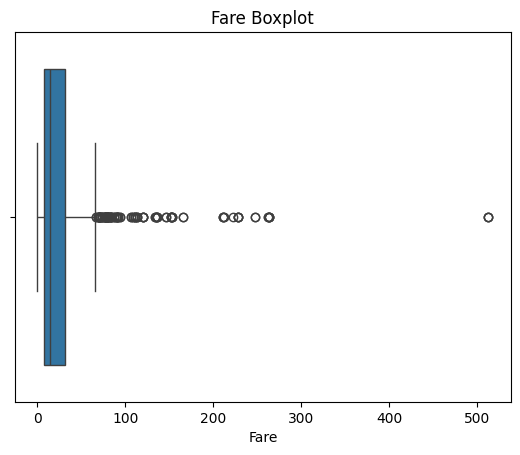

In [47]:
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.show()
     

In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

data = remove_outliers(df, 'Fare')

In [19]:

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
     

## Model Building

## logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7612903225806451
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        95
           1       0.74      0.58      0.65        60

    accuracy                           0.76       155
   macro avg       0.76      0.73      0.74       155
weighted avg       0.76      0.76      0.75       155



## Random forest

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf),'\n','-'*60)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7677419354838709 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        95
           1       0.72      0.65      0.68        60

    accuracy                           0.77       155
   macro avg       0.76      0.75      0.75       155
weighted avg       0.77      0.77      0.77       155



##  Decision Tree

In [24]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {acc_dt:.4f}')

Decision Tree Accuracy: 0.7484


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn),'\n','-'*60)
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7225806451612903 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        95
           1       0.68      0.53      0.60        60

    accuracy                           0.72       155
   macro avg       0.71      0.69      0.69       155
weighted avg       0.72      0.72      0.71       155



## Best Model is Random Forest

## Hyper Parametric Tuning

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1, 
                           verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy Score: 0.846774193548387


In [29]:
# Cross-validation for Random Forest
rf_cv = RandomForestClassifier(**grid_search.best_params_)
cv_scores = cross_val_score(rf_cv, X_train, y_train, cv=5)

print("Random Forest Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Random Forest Cross-Validation Scores: [0.83064516 0.87096774 0.7983871  0.92741935 0.7983871 ]
Mean Cross-Validation Score: 0.8451612903225806
